# Binary Logistic Regression (L1-Penalized and strong regularization of 0.001)
The features in parnetheses are added as parameters when calling the LogisticRegression()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# Set workplace features
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [3]:
insurance = pd.read_csv("C:/Users/tohaj/Box/Programming/Data Science/DATA SETS/insurance.csv")

In [4]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Text(0.5, 1.0, 'Heatmap showing the distribution of missing values in the data')

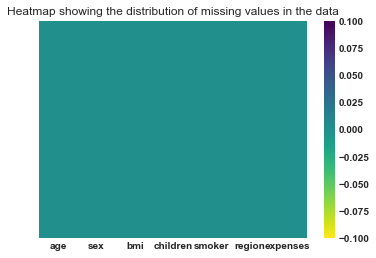

In [5]:
sns.heatmap(insurance.isnull(), cbar = True, cmap = 'viridis_r', yticklabels = False)
plt.title('Heatmap showing the distribution of missing values in the data')

No missing values

Text(0.5, 1.0, 'Boxplot of bmi by smoking status')

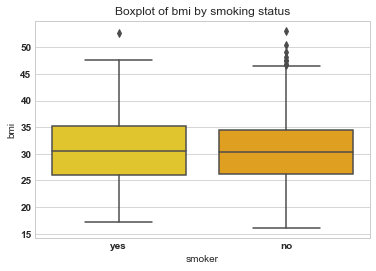

In [6]:
sns.boxplot(x = 'smoker', y = 'bmi', data = insurance, palette = 'Wistia')
plt.title('Boxplot of bmi by smoking status')

Text(0.5, 1.0, 'Boxplot of age by smoking status')

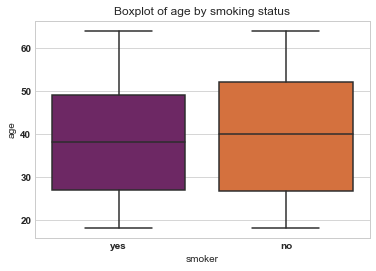

In [7]:
sns.boxplot(x = 'smoker', y = 'age', data = insurance, palette = 'inferno')
plt.title('Boxplot of age by smoking status')

Text(0.5, 1.0, 'Boxplot of insurance expenses by smoking status')

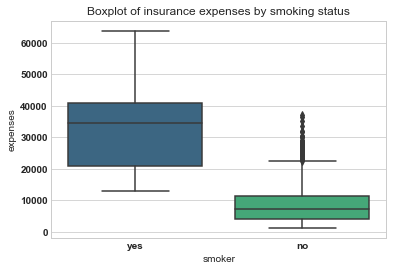

In [8]:
sns.boxplot(x = 'smoker', y = 'expenses', data = insurance, palette = 'viridis')
plt.title('Boxplot of insurance expenses by smoking status')

Text(0.5, 1.0, 'Violinplot of insurance expenses by smoking status')

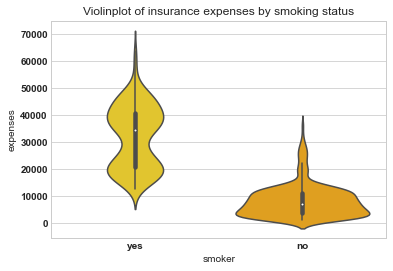

In [9]:
sns.violinplot(x = 'smoker', y = 'expenses', data = insurance, palette = 'Wistia')
plt.title('Violinplot of insurance expenses by smoking status')

In [10]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46


In [11]:
# recode binary nominals as binary (0 and 1)
#Sex
insurance.sex = insurance.sex.map({'male':0, 'female':1})
#Smoker
insurance.smoker = insurance.smoker.map({'yes':1, 'no':0})

In [12]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [13]:
# dummy recode nominal variables with more than two categories
insurance_recode = pd.get_dummies(data = insurance, columns = {'region', 'children'}, prefix = 'dummy', prefix_sep = '_')
insurance_recode.head(5)

C:\Users\tohaj\AppData\Local\Temp\ipykernel_20992\2734211086.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  insurance_recode = pd.get_dummies(data = insurance, columns = {'region', 'children'}, prefix = 'dummy', prefix_sep = '_')


,age,sex,bmi,smoker,expenses,dummy_northeast,dummy_northwest,dummy_southeast,dummy_southwest,dummy_0,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5
0,19,1,27.9,1,16884.92,0,0,0,1,1,0,0,0,0,0
1,18,0,33.8,0,1725.55,0,0,1,0,0,1,0,0,0,0
2,28,0,33.0,0,4449.46,0,0,1,0,0,0,0,1,0,0
3,33,0,22.7,0,21984.47,0,1,0,0,1,0,0,0,0,0
4,32,0,28.9,0,3866.86,0,1,0,0,1,0,0,0,0,0


In [14]:
# Split data into IVs and DV
X = insurance_recode.drop(['smoker'], axis = 1)
y = insurance_recode['smoker']

In [15]:
X.head()

,age,sex,bmi,expenses,dummy_northeast,dummy_northwest,dummy_southeast,dummy_southwest,dummy_0,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5
0,19,1,27.9,16884.92,0,0,0,1,1,0,0,0,0,0
1,18,0,33.8,1725.55,0,0,1,0,0,1,0,0,0,0
2,28,0,33.0,4449.46,0,0,1,0,0,0,0,1,0,0
3,33,0,22.7,21984.47,0,1,0,0,1,0,0,0,0,0
4,32,0,28.9,3866.86,0,1,0,0,1,0,0,0,0,0


In [16]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64

In [17]:
# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [18]:
# fit the regression model
model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.001)
model.fit(X_train, y_train)

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [19]:
# use the model to predict test data
y_pred_sk = model.predict(X_test)

In [20]:
# For comparison, put predicted y and actual y side by side in a table
y_pred = pd.Series(y_pred_sk)

y_test = y_test.reset_index(drop = True)
z = pd.concat([y_pred, y_test], axis = 1)
z.columns = ['Actual', 'Predicted']
z.head(10)

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,1
8,0,0
9,0,1


The table above shows 80% prediction accuracy (8 out of 10 predicted correctly).

In [21]:
# Evaluate the entire dataset
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

print('R_squared:', model.score(X_test, y_test)) # same as accuracy above

Accuracy: 0.9129353233830846
Precision: 0.782051282051282
Recall: 0.7721518987341772
R_squared: 0.9129353233830846


$\mathbf{R^2}$ is 91%!

## Confusion Matrix

Text(0.5, 19.5, 'Predicted')

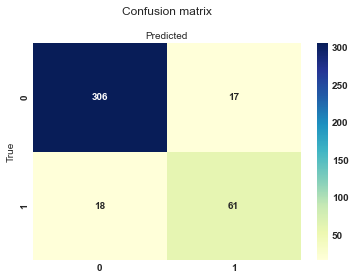

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')